# The Influence of Various Variables on Borrower APR in Prosper Loan Dataset
## by Jamal Taghavimehr

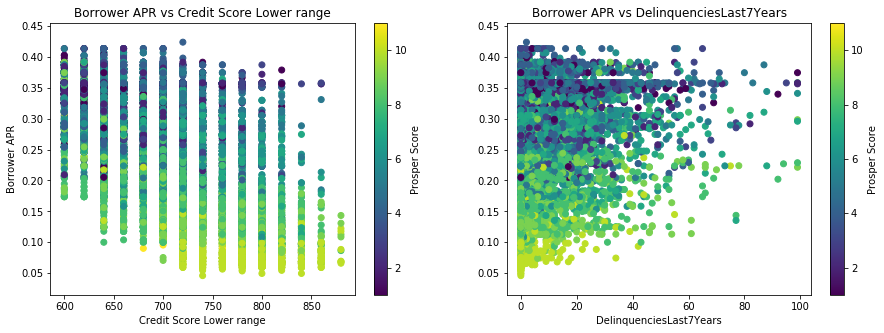

## Investigation Overview

> I investigated the effect of various variables including Prosper Score, Credit Score Range Lower, Delinquencies Over the Past 7 Years, Income Range, Loan Status, and Trades Never Delinquent over the Past 7 Years on Borrower APR.

## Dataset Overview

> The dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I will narrow my analysis on 18 variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# take a subset of data having only finalized loans
comchar_loan = df.query('LoanStatus == "Completed" | LoanStatus == "Chargedoff"')

In [4]:
# take a subset of variables to start visualization with
comchar_loan2 =  comchar_loan[['BorrowerAPR','Term','BorrowerState','ProsperScore','ListingCategory (numeric)',
                                 'Occupation','EmploymentStatus','LoanStatus',
                                 'EmploymentStatusDuration','IsBorrowerHomeowner','CreditScoreRangeLower',
                                 'OpenRevolvingMonthlyPayment','StatedMonthlyIncome','MonthlyLoanPayment',
                                 'TradesNeverDelinquent (percentage)','IncomeRange','DelinquenciesLast7Years',
                                 'TotalCreditLinespast7years']]

In [5]:
# drop null values from all columns
comchar_loan3 = comchar_loan2.dropna(axis=0,how='any')

## Distribution of Borrower APR

> Borrower APR is an important characteristic of a loan which is both indicative of how much a borower is trustworthy and also can be as a result of other variables of interest. Higher borrower APR is indicative of a high risk loan which is obtained by a borrower who in general doesn't have high financial stability. This plot means that more than 3500 borrowers have earned their loans with 35% annual percentage rate while no other APR has surpassed 1500 frequency.

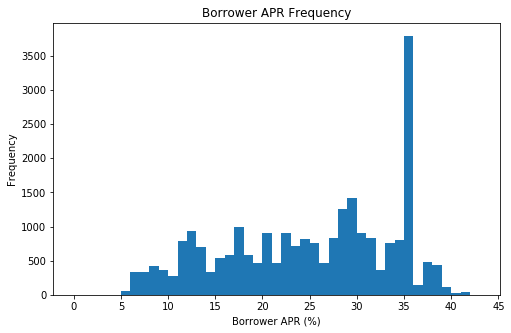

In [6]:
# investigation of the most important feature - Borrower APR
# looking at the distribution
plt.figure(figsize=[8,5])
bins = np.arange(0, (comchar_loan3['BorrowerAPR']*100).max()+1, 1)
sb.distplot((comchar_loan3['BorrowerAPR']*100), bins = bins, kde = False, hist_kws = {'alpha' : 1})
plt.title('Borrower APR Frequency')
plt.ylabel('Frequency')
plt.xlabel('Borrower APR (%)')
plt.xticks(np.arange(0, 50, step=5));

## Correlation Matrix

> Borrower APR has the highest correlation with Prosper score and Credit Score Lower Range with correlation coefficient of -0.74 and -0.59, respectively. The correlation between APR and other variables is not as strong as these two variables. Prosper score and Credit Score Range Lower have correlation coefficient of 0.4 which is accounted as moderate correlation and might be indicative of collinearity. This might be partly due to the inclusion of credit score into the Prosper score. Trades never delinquent also have negative correlation of -0.51 with delinquencies over the past 7 years.

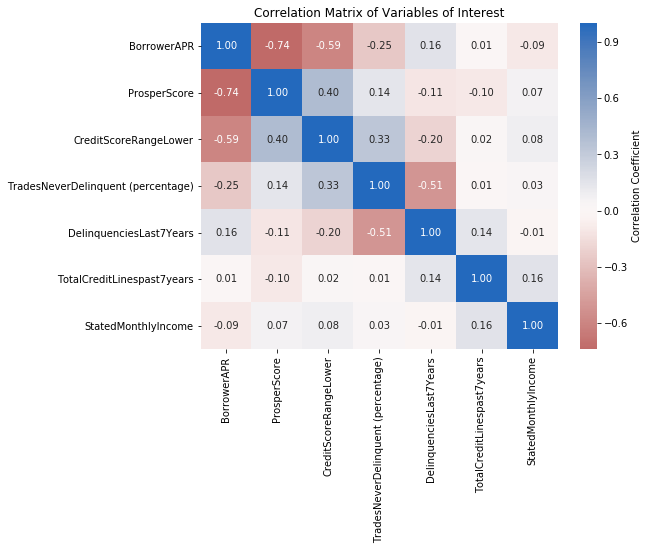

In [9]:
# correlation matrix between variables of interest
plt.figure(figsize=[8,6])
selected = ['BorrowerAPR', 'ProsperScore', 'CreditScoreRangeLower', 'TradesNeverDelinquent (percentage)', 
                         'DelinquenciesLast7Years', 'TotalCreditLinespast7years', 'StatedMonthlyIncome']
sb.heatmap(comchar_loan3[selected].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0, cbar_kws = {'label' : 'Correlation Coefficient'})
plt.title('Correlation Matrix of Variables of Interest');

## Borrower APR vs. Prosper Score and Income Range

> The median of the distribution of borrowers for Prosper score below 5 is kept at 35% while with increase in Prosper score from 5 to 10 the APR starts to decrease drastically and maybe significantly. This reduction comes to a point where the whole distribution at score of 11 is below 15% and no borrower gets a loan with APR above 15% at this score. The scores of 8,9, and 10 are also much lower in APR with median rates equal to 17, 14, and 7% respectively. There are lots of outliers at these scores but their numbers are much smaller compared to the rest of the distributions. I would like to point out that seemingly Prosper thinks of Prosper score of 5 as a cut-off point for the majority of borrowers to approve their loans with lower APR. In other words, No matter a borrower has score of 2 or 4, it is really hard to get a loan below 35% APR and other factors should be in favor of the borrower to reduce their APR. Up to score of 5, half of the borrowers had APR above 35%. In the second graph, we can see high variability in the distribution of each income bracket which makes it hard to compare brackets of income in terms of borrower APR but interestingly the median of the income brackets show a decreasing trend in APR with increase in salary. Other parameters should be confounding here which don't let us to see a clear difference in whole distributions.

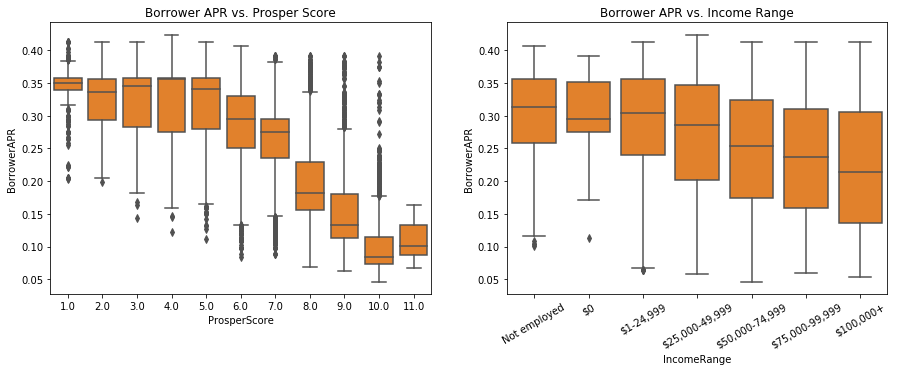

In [10]:
# putting values for income range in order
income_orders = ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
inorders = pd.api.types.CategoricalDtype(ordered = True, categories = income_orders)
comchar_loan3['IncomeRange'] = comchar_loan3['IncomeRange'].astype(inorders)

# draw box plots for APR vs Prosper score and income range
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
base_color = sb.color_palette()[1]
sb.boxplot(data = comchar_loan3, x = 'ProsperScore', y = 'BorrowerAPR', color = base_color)
plt.title('Borrower APR vs. Prosper Score')

plt.subplot(1,2,2)
base_color = sb.color_palette()[1]
sb.boxplot(data = comchar_loan3, x = 'IncomeRange', y = 'BorrowerAPR', color = base_color)
plt.title('Borrower APR vs. Income Range')
plt.xticks(rotation=30);

## Borrower APR vs. Income Range and Loan Status

> Obviously borrower APR was the lowest for highest bracket of income and completed loans and highest for not employed borrowers whose loans got charged off.

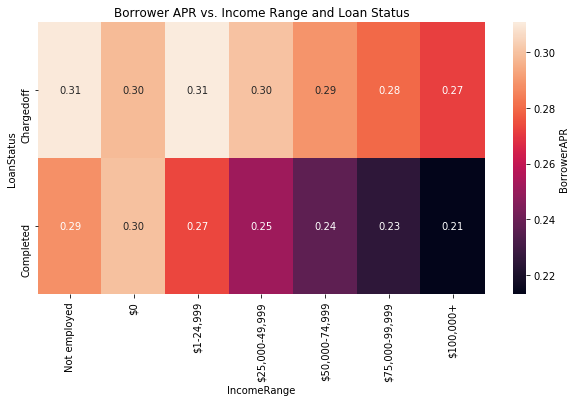

In [12]:
# darw facet grid of boxplots for variables of interest
plt.figure(figsize=[10,5])
cat = comchar_loan3.groupby(['IncomeRange', 'LoanStatus']).mean()['BorrowerAPR']
cat = cat.reset_index(name = 'BorrowerAPR')
cat = cat.pivot(index = 'LoanStatus', columns = 'IncomeRange',
                            values = 'BorrowerAPR')
sb.heatmap(cat, annot = True, fmt = '.2f',
           cbar_kws = {'label' : 'BorrowerAPR'})
plt.title('Borrower APR vs. Income Range and Loan Status');

## Borrower APR vs. Credit Score Lower Range and Delinquencies Over the Last 7 Years by Prosper Score

> In the first graph borrowers with very high Prosper scores have loans below 10% APR irrespective of the credit score. As it can be seen it is less probable to observe borrowers with Prosper scores around 10 and credit score lower than 700 to earn their loans below 10-15%. On the other hand, it is less probable to observe borrowers with credit score higher than 800 and APR above 25% whose Prosper score is below 5. I suspect that such individuals might not even exist as someone who has a credit score above 800 shouldn't have Prosper score below 4 or 5. In the second graph borrowers with prosper score around 10 are mostly limited to delinquencies below 20 and again APR less than 10%. One more information which can be obtained from this graph is that with increasing APR the Prosper score tends to reduce while the variability of data points along the number of delinquencies incerases. Apparently, borrowers with lower Prosper score are having so varied number of delinquencies at higher APRs.

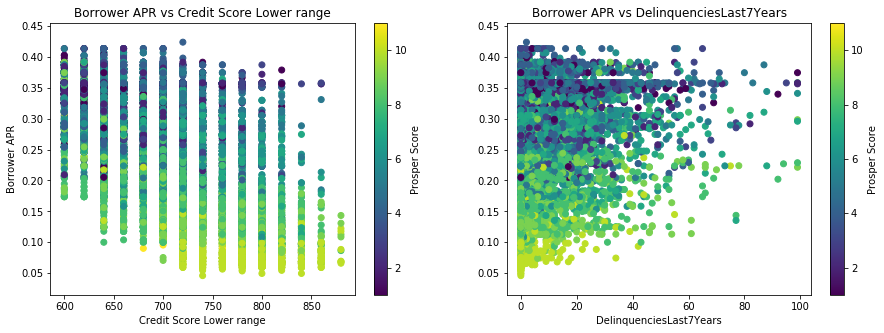

In [13]:
# draw mutivariate scatter plot between borrower APR vs credit score range lower and delinquencies over past 7 years
# via incorporation of Prosper score
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.scatter(data = comchar_loan3, x = 'CreditScoreRangeLower', y = 'BorrowerAPR', c = 'ProsperScore')
plt.colorbar(label='Prosper Score')
plt.title('Borrower APR vs Credit Score Lower range')
plt.ylabel('Borrower APR')
plt.xlabel('Credit Score Lower range')

plt.subplot(1,2,2)
plt.scatter(data = comchar_loan3, x = 'DelinquenciesLast7Years', y = 'BorrowerAPR', c = 'ProsperScore')
plt.colorbar(label='Prosper Score')
plt.title('Borrower APR vs DelinquenciesLast7Years')
plt.xlabel('DelinquenciesLast7Years');